# 라이브러리 및 데이터 로드 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

#ignore warningss
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 원본데이터가 상하지 않게 copy해서 불러오는 습관 들이기
train_df = pd.read_csv('data/train.csv').copy()
test_df = pd.read_csv('data/test.csv').copy()

# 데이터 정보 확인

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  916 non-null    int64  
 1   Pclass    916 non-null    int64  
 2   Sex       916 non-null    object 
 3   Age       741 non-null    float64
 4   Sibsp     916 non-null    int64  
 5   Parch     916 non-null    int64  
 6   Ticket    916 non-null    object 
 7   Fare      916 non-null    float64
 8   Cabin     214 non-null    object 
 9   Embarked  914 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 71.7+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    393 non-null    float64
 1   Sex       393 non-null    object 
 2   Age       305 non-null    float64
 3   Sibsp     393 non-null    float64
 4   Parch     393 non-null    float64
 5   Ticket    393 non-null    object 
 6   Fare      392 non-null    float64
 7   Cabin     81 non-null     object 
 8   Embarked  393 non-null    object 
dtypes: float64(5), object(4)
memory usage: 27.8+ KB


In [5]:
train_df.head()

,Survived,Pclass,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,female,13.0,0,1,250644,19.5000,NaN,S
1,1,2,female,4.0,1,1,29103,23.0000,NaN,S
2,1,2,female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C
3,0,3,male,NaN,0,0,36209,7.7250,NaN,Q
4,1,3,female,22.0,0,0,334914,7.7250,NaN,Q


In [6]:
# survived column은 y값이기 때문에 없음

test_df.head()

,Pclass,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,3.0,male,38.0,0.0,0.0,349249,7.8958,NaN,S
1,2.0,female,21.0,0.0,1.0,S.O./P.P. 2,21.0000,NaN,S
2,2.0,male,42.0,1.0,0.0,243847,27.0000,NaN,S
3,3.0,male,NaN,0.0,0.0,364498,14.5000,NaN,S
4,2.0,male,25.0,0.0,0.0,C.A. 31029,31.5000,NaN,S


# 결측치 확인 

In [7]:
print('train data 결측치 비율 \n')

for col in train_df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * train_df[col].isnull().sum() / train_df[col].shape[0])
    print(msg)

train data 결측치 비율 

column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.10%
column:      Sibsp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 76.64%
column:   Embarked	 Percent of NaN value: 0.22%


In [8]:
print('test data 결측치 비율 \n')
for col in test_df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * test_df[col].isnull().sum() / test_df[col].shape[0])
    print(msg)

test data 결측치 비율 

column:     Pclass	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 22.39%
column:      Sibsp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.25%
column:      Cabin	 Percent of NaN value: 79.39%
column:   Embarked	 Percent of NaN value: 0.00%


# 결측치 처리

모든 결측치 처리 방법은 train data를 기준으로 한 뒤 test data에는 적용하는 방식으로 진행되어야함

age, cabin, embarked 3개의 Feature에 대해 각각 다른 결측치 처리 방법을 적용

### [Cabin]

In [9]:
train_df.shape, test_df.shape

((916, 10), (393, 9))

In [10]:
#결측치가 70% 이상 (의미없기에 삭제해버림)
train_df.drop('Cabin', axis = 1, inplace=True)
test_df.drop('Cabin', axis = 1, inplace=True)

In [11]:
train_df.shape, test_df.shape

((916, 9), (393, 8))

### [Age]

데이터의 속성에 따라 결측치를 처리하는 방법도 달라져야함    
Numeric? Categoric?

In [12]:
train_df.loc[:, ['Age', 'Embarked']].dtypes

Age         float64
Embarked     object
dtype: object

#### 단순대체

In [13]:
train_df.Age.mean()

30.23144399460189

In [14]:
train_df.Age.median()

28.0

In [15]:
train_df.Age.value_counts()

24.0000    32
21.0000    31
30.0000    30
22.0000    29
18.0000    27
           ..
45.5000     1
66.0000     1
0.8333      1
7.0000      1
0.1667      1
Name: Age, Length: 86, dtype: int64

In [16]:
train_df.Age.mode()

0    24.0
Name: Age, dtype: float64

In [17]:
train_df.Age.fillna(24).isna().sum()

# 아직 assign을 하지 않았기 때문에 원본 data에는 적용되지 않음

0

#### 다중대체

다중대체 시에는 문자 변수는 들어갈 수 없다.

In [18]:
train_df.head()

,Survived,Pclass,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked
0,1,2,female,13.0,0,1,250644,19.5000,S
1,1,2,female,4.0,1,1,29103,23.0000,S
2,1,2,female,30.0,1,0,SC/PARIS 2148,13.8583,C
3,0,3,male,NaN,0,0,36209,7.7250,Q
4,1,3,female,22.0,0,0,334914,7.7250,Q


In [19]:
# 다중대체 사용하기 전 전처리

data_imp = train_df.copy()
data_imp.drop(['Survived','Ticket', 'Embarked'], axis = 1, inplace = True)
data_imp['Sex'] = data_imp.Sex.map(lambda x: 1 if x == 'male' else 0)
data_imp

,Pclass,Sex,Age,Sibsp,Parch,Fare
0,2,0,13.0000,0,1,19.5000
1,2,0,4.0000,1,1,23.0000
2,2,0,30.0000,1,0,13.8583
3,3,1,NaN,0,0,7.7250
4,3,0,22.0000,0,0,7.7250
...,...,...,...,...,...,...
911,3,0,0.1667,1,2,20.5750
912,3,1,NaN,0,0,8.0500
913,3,0,NaN,0,0,7.7333
914,2,0,20.0000,0,0,36.7500


In [20]:
test_df.head()

,Pclass,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked
0,3.0,male,38.0,0.0,0.0,349249,7.8958,S
1,2.0,female,21.0,0.0,1.0,S.O./P.P. 2,21.0000,S
2,2.0,male,42.0,1.0,0.0,243847,27.0000,S
3,3.0,male,NaN,0.0,0.0,364498,14.5000,S
4,2.0,male,25.0,0.0,0.0,C.A. 31029,31.5000,S


In [21]:
# test set에도 같은 방법 적용
data_imp_te = test_df.copy()
data_imp_te.drop(['Ticket', 'Embarked'], axis = 1, inplace = True)
data_imp_te['Sex'] = data_imp_te.Sex.map(lambda x: 1 if x == 'male' else 0)
data_imp_te

,Pclass,Sex,Age,Sibsp,Parch,Fare
0,3.0,1,38.0,0.0,0.0,7.8958
1,2.0,0,21.0,0.0,1.0,21.0000
2,2.0,1,42.0,1.0,0.0,27.0000
3,3.0,1,NaN,0.0,0.0,14.5000
4,2.0,1,25.0,0.0,0.0,31.5000
...,...,...,...,...,...,...
388,3.0,1,33.0,0.0,0.0,7.8542
389,2.0,0,31.0,0.0,0.0,21.0000
390,3.0,1,NaN,0.0,0.0,7.7500
391,3.0,1,NaN,0.0,0.0,7.7500


In [22]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform')
value = imputer.fit_transform(data_imp)
data_imp = pd.DataFrame(columns = data_imp.columns, data = value)

In [23]:
train_df[train_df['Age'].isna()]

,Survived,Pclass,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked
3,0,3,male,NaN,0,0,36209,7.7250,Q
5,0,3,male,NaN,0,0,330971,7.8792,Q
14,0,3,male,NaN,0,0,SOTON/OQ 3101316,8.0500,S
19,0,3,male,NaN,0,0,A4. 54510,8.0500,S
20,1,3,female,NaN,0,0,330980,7.8792,Q
...,...,...,...,...,...,...,...,...,...
904,0,3,male,NaN,1,0,2689,14.4583,C
909,1,1,female,NaN,1,0,PC 17569,146.5208,C
910,1,3,male,NaN,0,0,312991,7.7750,S
912,0,3,male,NaN,0,0,376563,8.0500,S


In [24]:
# 결측치 였던 값들이 어떻게 변했나??
np.round(data_imp.loc[train_df[train_df['Age'].isna()].index]['Age'])

3      41.0
5      31.0
14     31.0
19     31.0
20     24.0
       ... 
904    26.0
909    24.0
910    26.0
912    31.0
913    29.0
Name: Age, Length: 175, dtype: float64

In [25]:
data_imp['Age'] = np.round(data_imp['Age'])

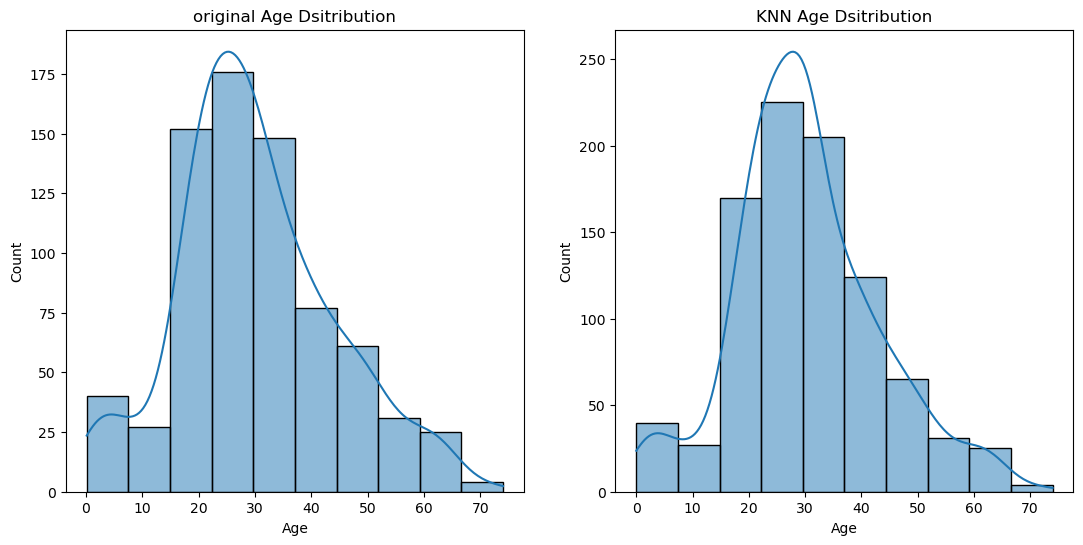

In [26]:
# 결측치 처리 전과 결측치 처리 후의 분포를 비교

fig, axes = plt.subplots(1,2, figsize = (13, 6))
sns.histplot(data = train_df, x = 'Age', ax = axes[0], bins=10, kde = True)
sns.histplot(data = data_imp, x = 'Age', ax = axes[1], bins=10, kde = True)

axes[0].set_title('original Age Dsitribution')
axes[1].set_title('KNN Age Dsitribution')
plt.show()

In [27]:
# 원본 데이터에서 결측치 처리
train_df['Age'] = data_imp['Age']

In [28]:
# 테스트 데이터에도 같은 결측치 처리

value_te = imputer.transform(data_imp_te) # test 데이터에는 transform만 수행!!
data_imp_te = pd.DataFrame(columns = data_imp_te.columns, data = value_te)
test_df['Age'] = np.round(data_imp_te['Age'])

### [Embarked]

 <font color = red> 항상 train set과 test set에 같은 처리를 해주어야함!

In [29]:
train_df['Embarked']

0      S
1      S
2      C
3      Q
4      Q
      ..
911    S
912    S
913    Q
914    S
915    Q
Name: Embarked, Length: 916, dtype: object

In [30]:
#최빈값 대체
#strategy : mean이나 median으로 바꿔줄 수도 있다.
from sklearn.impute import SimpleImputer
s_imputer = SimpleImputer(strategy='most_frequent')

train_df['Embarked'] = s_imputer.fit_transform(train_df[['Embarked']])
test_df['Embarked'] = s_imputer.transform(test_df[['Embarked']])

### [Fare]

In [31]:
# Fare에 있는 결측값 제거
test_df.drop(test_df[test_df['Fare'].isna()].index, axis = 0, inplace = True)

#### 최종확인 

In [32]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Sibsp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [33]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
Sibsp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 범주형 변수 처리

## Label encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() #labelencoder함수를 가져온다.
encoder.fit(train_df.Embarked) #내가 가지고 있는 데이터에 학습시킨다
Embarked_label = encoder.transform(train_df.Embarked) # transform으로 변환한다

In [35]:
# 여러 열에 적용하고 싶은 경우, for문 이용

label = ['Sex', 'Embarked']

for i in label:
    encoder = LabelEncoder()
    encoder.fit(train_df[i])
    # train_df[i]= encoder.transform(train_df[i])
    # test_df[i]= encoder.transform(test_df[i])

## one-hot encoding

In [36]:
train_df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [37]:
# get dummies 함수로 one hot encoding

pd.get_dummies(train_df.Embarked, prefix = 'Embarked')

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,0,0,1
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
911,0,0,1
912,0,0,1
913,0,1,0
914,0,0,1


In [38]:
pd.concat([train_df.Embarked ,pd.get_dummies(train_df.Embarked, prefix = 'Embarked')], axis = 1)

,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,S,0,0,1
1,S,0,0,1
2,C,1,0,0
3,Q,0,1,0
4,Q,0,1,0
...,...,...,...,...
911,S,0,0,1
912,S,0,0,1
913,Q,0,1,0
914,S,0,0,1


## Target encoding

In [39]:
#인코딩 하고자 하는 열을 기준으로 타겟값의 평균을 이용
Embarked_target_mean = train_df.groupby('Embarked')['Survived'].mean().to_dict() ; Embarked_target_mean

{'C': 0.553072625698324, 'Q': 0.37349397590361444, 'S': 0.3409785932721712}

In [40]:
train_df['Embarked'] = train_df['Embarked'].map(Embarked_target_mean)
test_df['Embarked'] = test_df['Embarked'].map(Embarked_target_mean) 
train_df['Embarked']

0      0.340979
1      0.340979
2      0.553073
3      0.373494
4      0.373494
         ...   
911    0.340979
912    0.340979
913    0.373494
914    0.340979
915    0.373494
Name: Embarked, Length: 916, dtype: float64

# 이상치 처리

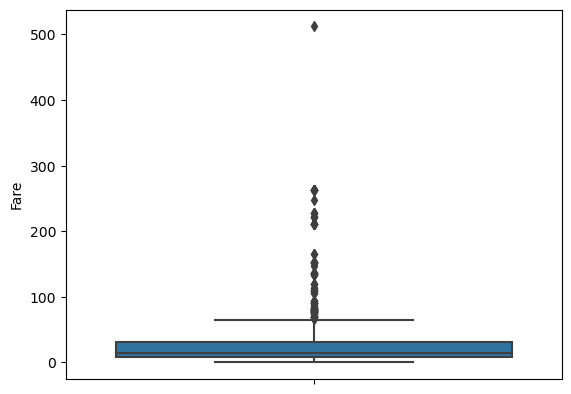

In [41]:
#지불금액
sns.boxplot(data = train_df , y = 'Fare')
plt.show()

In [42]:
def get_outlier(df=None,column=None,weight=1.5):
    
    column_x = df[column]
   
    # 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
    quantile_25 = np.percentile(column_x.values,25)
    quantile_75 = np.percentile(column_x.values,75)
    
    
    # IQR을 구하고 IQR에 1.5를 곱해 최댓값과 최솟값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 Dataframe index 반환
    outlier_index = column_x[(column_x < lowest_val) | (column_x > highest_val)].index
    return outlier_index

In [43]:
#이상치가 포함된 행을 제거
df_outlier = train_df.drop(get_outlier(df = train_df, column = 'Fare'), axis = 0)

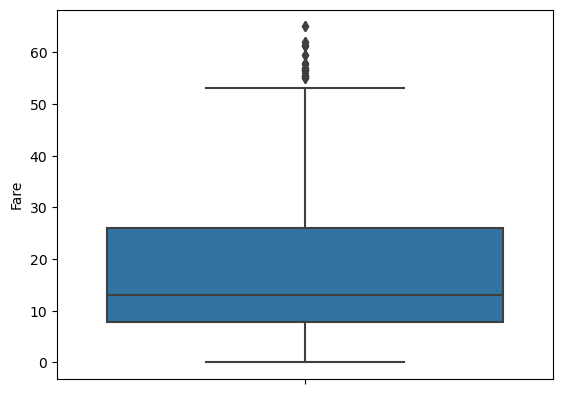

In [44]:
sns.boxplot(data = df_outlier, y = 'Fare')
plt.show()

#### 다른방법

In [45]:
# clip을 활용해 이상치(outlier)를 처리
# 낮은 0.05%와 높은 0.95% 데이터들을 대체한다.

train_df[['Fare']].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

,Fare
0,19.5000
1,23.0000
2,13.8583
3,7.7250
4,7.7250
...,...
911,20.5750
912,8.0500
913,7.7333
914,36.7500


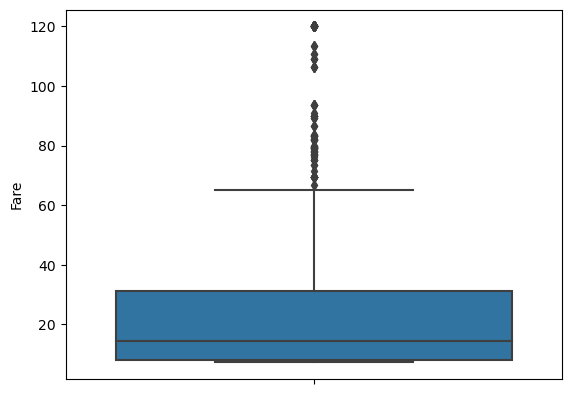

In [46]:
sns.boxplot(data = train_df[['Fare']].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0), y = 'Fare')
plt.show()

# Scaling

Scaling은 Numeric data에 대해서만 진행한다. (categoric은 불가능)

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer

In [48]:
train_df.head()

,Survived,Pclass,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked
0,1,2,female,13.0,0,1,250644,19.5000,0.340979
1,1,2,female,4.0,1,1,29103,23.0000,0.340979
2,1,2,female,30.0,1,0,SC/PARIS 2148,13.8583,0.553073
3,0,3,male,41.0,0,0,36209,7.7250,0.373494
4,1,3,female,22.0,0,0,334914,7.7250,0.373494


In [49]:
train_num = train_df[['Age','Fare']]
test_num = test_df[['Age','Fare']]

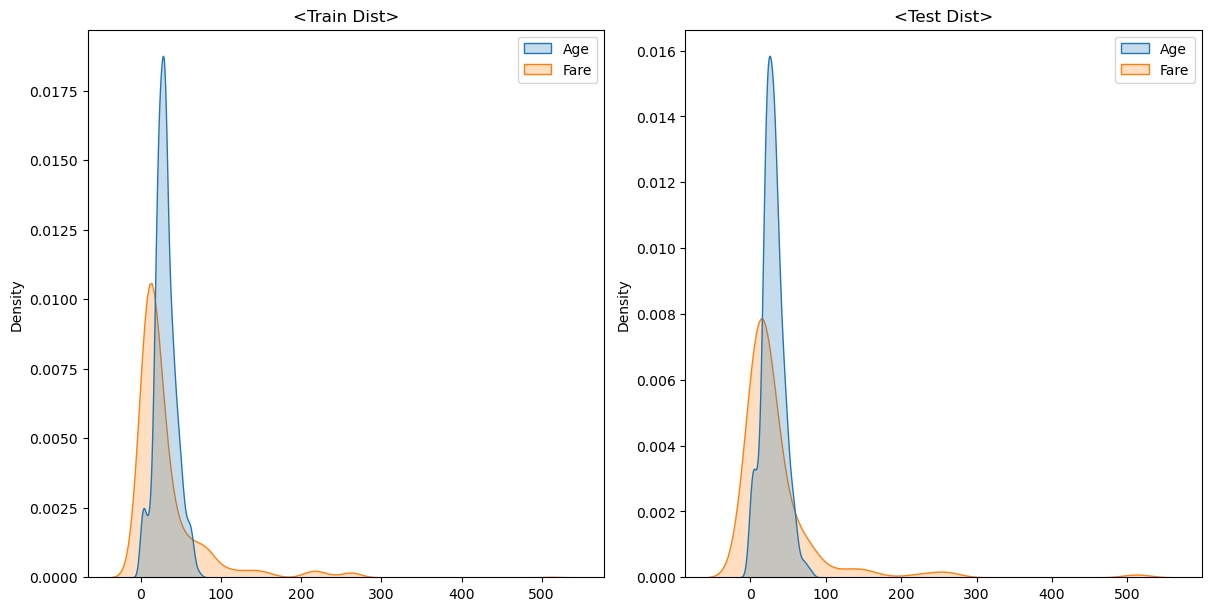

In [50]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6), constrained_layout=True)
sns.kdeplot(data = train_num[['Age','Fare']], shade = True, ax = axes[0])
axes[0].set_title('<Train Dist>')

sns.kdeplot(data = test_num[['Age','Fare']], shade = True, ax = axes[1])
axes[1].set_title('<Test Dist>')

plt.show()

In [51]:
scaler = StandardScaler()

train_num[['Age','Fare']] = scaler.fit_transform(train_num)
test_num[['Age','Fare']] = scaler.transform(test_num)

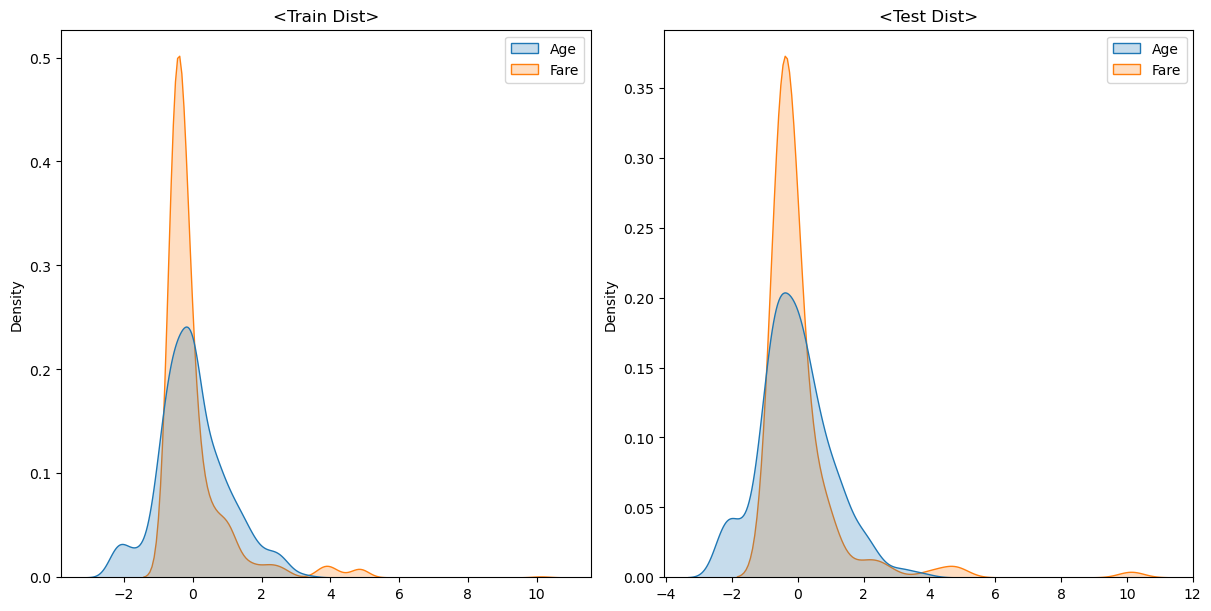

In [52]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6), constrained_layout=True)
sns.kdeplot(data = train_num[['Age','Fare']], shade = True, ax = axes[0])
axes[0].set_title('<Train Dist>')

sns.kdeplot(data = test_num[['Age','Fare']], shade = True, ax = axes[1])
axes[1].set_title('<Test Dist>')

plt.show()

# Transform

Fare data에 대해 log transform을 적용  

**log vs log1p**  
- 단순 np.log를 적용하면 0값을 포함한 데이터의 경우 -inf 라는 값을 가지게 된다.  
- 이를 방지하기 위해 log1p를 사용한다.

In [53]:
train_df['Fare_log'] = np.log1p(train_df['Fare'])
test_df['Fare_log'] = np.log1p(test_df['Fare'])

In [54]:
train_num = train_df[['Age','Fare', 'Fare_log']]
test_num = test_df[['Age','Fare', 'Fare_log']]

In [55]:
train_num.Fare_log.describe()

count    916.000000
mean       2.970333
std        0.972832
min        0.000000
25%        2.185579
50%        2.737881
75%        3.474293
max        6.240917
Name: Fare_log, dtype: float64

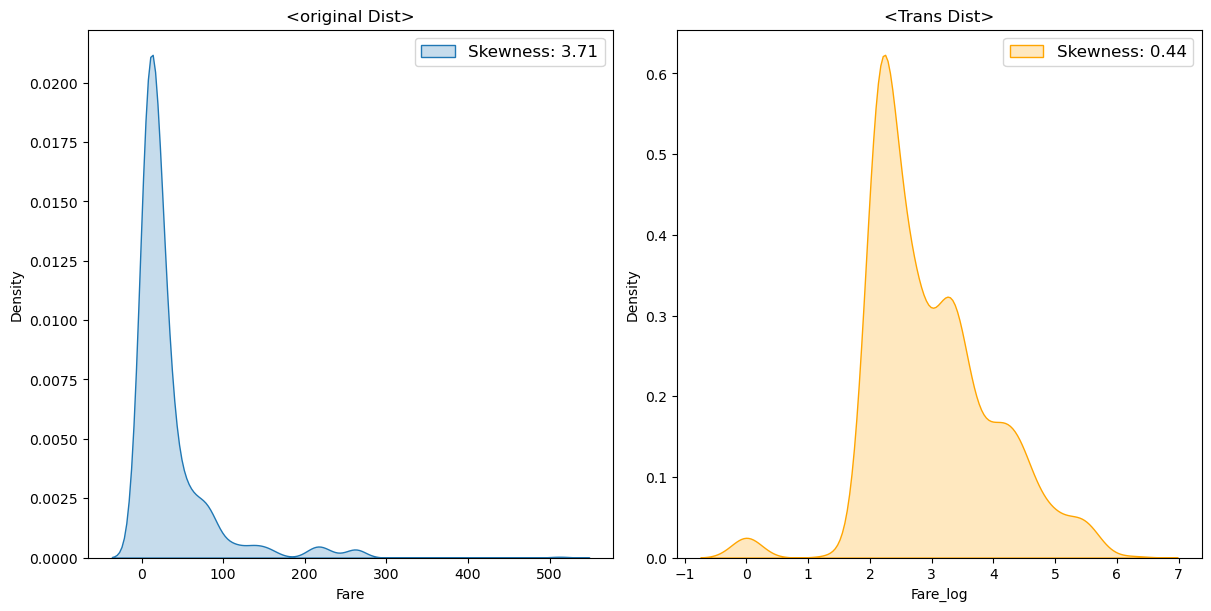

In [56]:
# 오리지널 data vs Trans data 비교하기

fig, axes = plt.subplots(1, 2, figsize = (12, 6), constrained_layout=True)


sns.kdeplot(data = train_df['Fare'], shade = True, ax = axes[0], label = 'Skewness: {:.2f}'.format(train_df['Fare'].skew()))
axes[0].set_title('<original Dist>')
axes[0].legend(fontsize = 12)

sns.kdeplot(data = train_num['Fare_log'], shade = True, ax = axes[1], label = 'Skewness: {:.2f}'.format(train_num['Fare_log'].skew()),
           color='orange')
axes[1].set_title('<Trans Dist>')
axes[1].legend(fontsize = 12)

plt.show()

# Feature Extraction

### [보스턴 집값예측 Data ]

독립변수

- CRIM: 범죄율

- INDUS: 비소매상업지역 면적 비율

- NOX: 일산화질소 농도

- RM: 주택당 방 수

- LSTAT: 인구 중 하위 계층 비율

- B: 인구 중 흑인 비율

- PTRATIO: 학생/교사 비율

- ZN: 25,000 평방피트를 초과 거주지역 비율

- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0

- AGE: 1940년 이전에 건축된 주택의 비율

- RAD: 방사형 고속도로까지의 거리

- DIS: 직업센터의 거리

- TAX: 재산세율

종속변수

- MEDV : 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

#### <font color = red> 집값 예측이기 때문에 회귀문제

In [57]:
boston_df = pd.read_csv('data/boston.csv')

In [58]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [59]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# PCA

In [60]:
boston_df_2 = boston_df.iloc[:,:-1].copy()

In [61]:
boston_df_2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554696,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115877,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


각 컬럼마다 scale이 다르기 때문에 scale을 맞추어준 후 pca를 진행한다.

In [62]:
from sklearn.preprocessing import StandardScaler
boston_scale = StandardScaler().fit_transform(boston_df_2)

In [63]:
# fit_transfrom 후에는 보통 numpy array로 결과 도출
boston_scale

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [64]:
from sklearn.decomposition import PCA
boston_pca = PCA().fit(boston_scale) 

In [65]:
#차원이 줄어들수록 분산은 더 작아짐 -> 데이터가 손실되는 양이 조금 더 커질 것임
# 85% ~ 90% 의 분산은 보존하게끔 pca 진행
np.cumsum(boston_pca.explained_variance_ratio_)

array([0.47129603, 0.58154822, 0.6771341 , 0.74310138, 0.80731805,
       0.85788777, 0.89906892, 0.92953805, 0.9508414 , 0.96778271,
       0.98209149, 0.99511467, 1.        ])

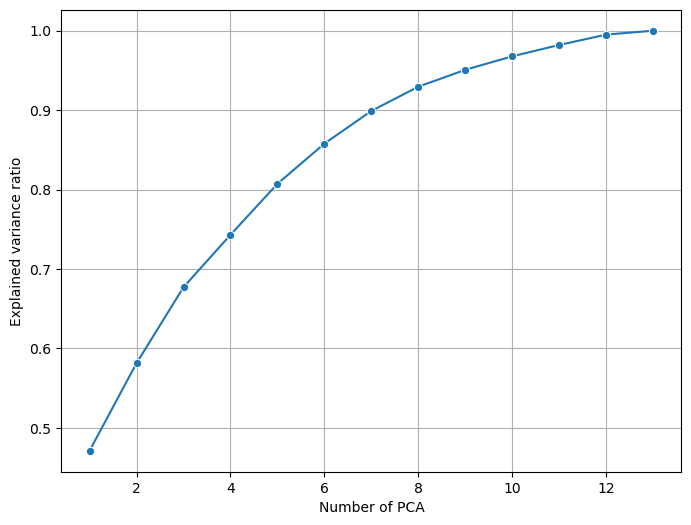

In [66]:
#차원이 늘수록, 설명되는 분산의 비율이 얼만큼 증가하는지를 나타낸 그래프
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
x_values = np.arange(1, boston_scale.shape[1] + 1)
y_values = np.cumsum(boston_pca.explained_variance_ratio_)
sns.lineplot(x=x_values, y=y_values, marker='o', ax=ax)
plt.grid()
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()


- PC차원이 8개일 때 전체 data의 90% 정도를 설명할 수 있다.  
- 전체데이터의 어느정도를 설명할 지 결정하는 것은 분석가의 몫이다.

In [67]:
boston_pca = PCA(n_components= 8).fit_transform(boston_scale) 

In [68]:
pd.DataFrame(boston_pca)

,0,1,2,3,4,5,6,7
0,-2.098299,0.773118,0.342939,-0.891774,0.423066,-0.315343,0.318636,0.295839
1,-1.457254,0.591979,-0.695203,-0.487458,-0.195881,0.264219,0.553865,-0.223669
2,-2.074600,0.599637,0.167118,-0.739202,-0.934540,0.448089,0.484562,0.105174
3,-2.611506,-0.006872,-0.100285,-0.343719,-1.104956,0.664645,0.622646,0.255971
4,-2.458188,0.097709,-0.075350,-0.427904,-1.065926,0.617043,0.705094,-0.134496
...,...,...,...,...,...,...,...,...
501,-0.314970,0.724278,-0.860901,-0.434732,-1.121044,0.508068,0.199071,-0.249875
502,-0.110515,0.759300,-1.255984,-0.309369,-0.891546,0.408212,0.191792,-0.146484
503,-0.312362,1.155239,-0.408606,-0.786294,-1.595193,0.467950,0.294137,-0.638642
504,-0.270521,1.041354,-0.585461,-0.678125,-1.416032,0.482263,0.271614,-0.579326


#### 함수활용 pca 

In [69]:
def getPCA(df):
    max_col = df.shape[1]
    pca = PCA(n_components=max_col, random_state=0).fit(df)

    cumsum = np.cumsum(pca.explained_variance_ratio_) 
    num_col = np.argmax(cumsum > 0.9) + 1

    pca = PCA(n_components = num_col, random_state=0).fit_transform(df)
    return pd.DataFrame(pca)   

In [70]:
getPCA(boston_scale)

,0,1,2,3,4,5,6,7
0,-2.098299,0.773118,0.342939,-0.891774,0.423066,-0.315343,0.318636,0.295839
1,-1.457254,0.591979,-0.695203,-0.487458,-0.195881,0.264219,0.553865,-0.223669
2,-2.074600,0.599637,0.167118,-0.739202,-0.934540,0.448089,0.484562,0.105174
3,-2.611506,-0.006872,-0.100285,-0.343719,-1.104956,0.664645,0.622646,0.255971
4,-2.458188,0.097709,-0.075350,-0.427904,-1.065926,0.617043,0.705094,-0.134496
...,...,...,...,...,...,...,...,...
501,-0.314970,0.724278,-0.860901,-0.434732,-1.121044,0.508068,0.199071,-0.249875
502,-0.110515,0.759300,-1.255984,-0.309369,-0.891546,0.408212,0.191792,-0.146484
503,-0.312362,1.155239,-0.408606,-0.786294,-1.595193,0.467950,0.294137,-0.638642
504,-0.270521,1.041354,-0.585461,-0.678125,-1.416032,0.482263,0.271614,-0.579326


#### <font color = red> PCA는 one-hot-Encoding 같이 실질적인 데이터는 적은데 차원은 많은 Sparse data 등을 줄이기 위한 방법으로도 사용된다!